For lab meeting on 11/10/25: 

- load in data
- run pearson correlations across all rois
- save coefficients as array for that roi


Rerun supervoxels_correlations ipynb for correlation until tracking drop

In [2]:
import glob
import h5py
import pandas as pd

from src import io, moco, roi, ttl, zdF
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from scipy.stats import pearsonr

In [3]:
# set main data path
base_data_path = "/home/ptarabishi/repos/maui_codebook/data/251024_1901"
exp = 1901

# set experiment file path
# processed_path = glob.glob(os.path.join(base_data_path, 'processed', f'*{exp}'))

# changed from normal format to run on home computer
processed_path = base_data_path
print(processed_path)


cluster_labels, signal = io.load_clusters(processed_path)
scope_fr, camera_fr, brain_dim = io.load_acquisition_params(processed_path)

# convert maui and behavior time
frames = [x for x in range(1, signal.shape[-1])]
volume_per_s = scope_fr/signal.shape[0] # volume rate in Hz
maui_time = [0] + [x / volume_per_s for x in frames]
# smoothed_speed, xy_pos, delta_rot = io.load_fictrac_data(processed_path)

/home/ptarabishi/repos/maui_codebook/data/251024_1901


In [72]:
# vis features
div_cmap = sns.color_palette('coolwarm', as_cmap=True)
sing_cmap = sns.color_palette('plasma', as_cmap=True)
color = 'b'

In [5]:
# def calculate_roi_correlation:

In [6]:
# collapse first two dimensions so all rois are within same column
all_signals = np.reshape(signal, (signal.shape[0]*signal.shape[1], -1))
print(signal.shape, all_signals.shape)

(31, 1000, 1339) (31000, 1339)


31000


(array([9.4000e+01, 1.0480e+03, 5.7250e+03, 1.2518e+04, 6.8560e+03,
        2.6910e+03, 1.2470e+03, 6.3000e+02, 1.8600e+02, 5.0000e+00]),
 array([-0.66143102, -0.49528792, -0.32914482, -0.16300172,  0.00314139,
         0.16928449,  0.33542759,  0.50157069,  0.6677138 ,  0.8338569 ,
         1.        ]),
 <BarContainer object of 10 artists>)

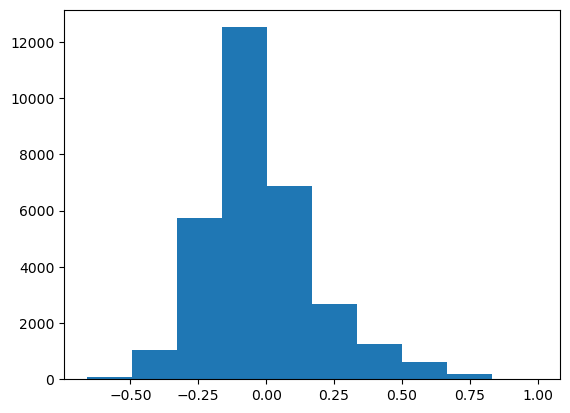

In [7]:
# find correlation of roi 1 to all other rois
single_roi = signal[0,0]

pearson_array = []
for roi_idx, ca_response in enumerate(all_signals):
    corr = pearsonr(single_roi,ca_response).statistic
    pearson_array.append(corr)

print(len(pearson_array))
plt.hist(pearson_array)

max size: 9756 average size: 44.8 +- 218.75495467199912
(31, 1000)
(31000,)


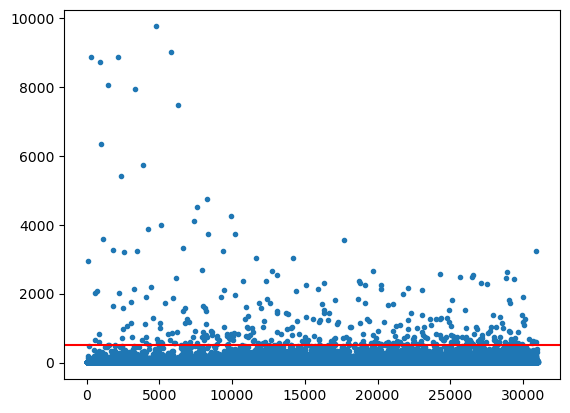

In [19]:
# lets remove all of the super large rois
# how do I get all the sizes of the clusters? 
cluster_labels[0]
roi_size = []

# for slice_idx, ids in enumerate(cluster_labels):
#     if slice_idx==0:
#         values, counts = np.unique (cluster_labels[slice_idx], return_counts=True)
#         roi_size.append(counts)
# roi_size = np.array(roi_size)
# print(fr'max size: {roi_size[0].max()} average size: {roi_size[0].mean()} +- {np.std(roi_size[0])}')
# print(roi_size[0].shape)

for slice_idx, ids in enumerate(cluster_labels):
    values, counts = np.unique (cluster_labels[slice_idx], return_counts=True)
    roi_size.append(counts)
roi_size = np.array(roi_size)
print(fr'max size: {roi_size.max()} average size: {roi_size.mean()} +- {np.std(roi_size)}')
print(roi_size.shape)

roi_size = roi_size.reshape(-1)
print(roi_size.shape)
plt.figure()
plt.plot(roi_size, '.')
plt.axhline(500, c='r')
# theres a ton of single pixel rois and super large ones, setting max at average + stdev

In [93]:
# remove single pixel and very large rois
print(all_signals.shape, roi_size.shape)

signal_subset = []
signal_subset_slice = []
for roi_idx, roi in enumerate(all_signals):
    if 1 < roi_size[roi_idx] >=500:
        signal_subset.append(roi)
        signal_subset_slice.append(str(roi_idx))

signal_subset = np.array(signal_subset)
print(signal_subset.shape)
print(signal_subset_slice)

subset_slice = []
for val in signal_subset_slice:
    if len(val) <= 3:
        subset_slice.append(0)
    elif len(val) ==4:
        subset_slice.append(val[0])
    elif len(val) ==5:
        subset_slice.append(val[:2])
print(subset_slice)


(31000, 1339) (31000,)
(380, 1339)
['92', '316', '595', '597', '721', '856', '857', '931', '1018', '1136', '1463', '1498', '1525', '1831', '1840', '1970', '2133', '2257', '2345', '2412', '2527', '2533', '2539', '2787', '3031', '3032', '3084', '3225', '3332', '3481', '3783', '3889', '4035', '4057', '4091', '4115', '4224', '4262', '4398', '4594', '4749', '4820', '4923', '4926', '5050', '5066', '5082', '5103', '5111', '5204', '5361', '5607', '5702', '5800', '5852', '5918', '5978', '6061', '6111', '6222', '6302', '6469', '6593', '6601', '6750', '6764', '6772', '6900', '7071', '7109', '7290', '7411', '7416', '7596', '7599', '7937', '7950', '7972', '7973', '8082', '8132', '8187', '8191', '8220', '8254', '8276', '8373', '8545', '8594', '8616', '8983', '8991', '8992', '9073', '9227', '9379', '9434', '9451', '9646', '9652', '9661', '9719', '9787', '9836', '9897', '9913', '9968', '9975', '10038', '10039', '10057', '10129', '10188', '10221', '10376', '10702', '10779', '10907', '10926', '10954', '

In [97]:
df = pd.DataFrame(signal_subset.T, columns=subset_slice)
print(df.shape)

(1339, 380)


Text(0.5, 1.0, 'pearson correlation')

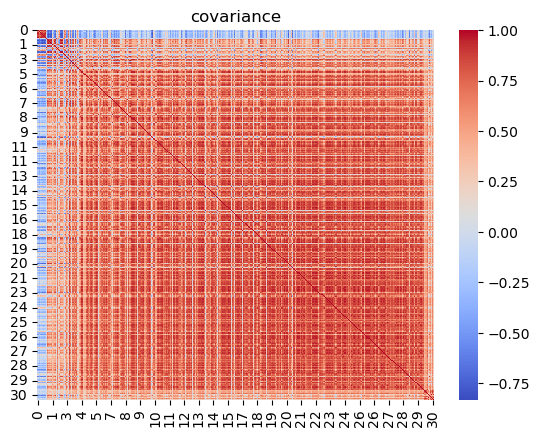

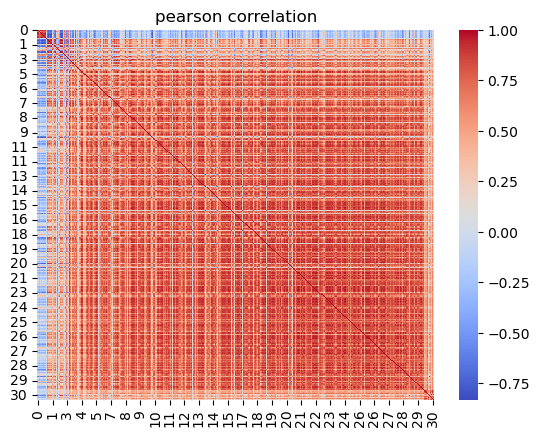

In [99]:
# run correlations on all rois
# pearsons_across_rois = np.corrcoef(signal_subset)

pearsons_across_rois = df.corr(method='pearson')
covariance_rois = df.cov()
plt.figure()
# plt.plot(pearsons_across_rois, '.')
# print(pearsons_across_rois.shape)
sns.heatmap(covariance_rois, cmap=div_cmap)
plt.title('covariance')

plt.figure()
sns.heatmap(pearsons_across_rois, cmap = div_cmap)
plt.title('pearson correlation')

In [ ]:
# can I group by slice? 
slice_pearson = pearsons_across_rois.groupby()
